### Problem Set 3

1. a) predictive regression with Fama-Macbeth

$ret_{i,t+1} = α + β_1city_returns_{i,t} + β_2indret_{i,t} + ε_{it}$

In [1]:
#libraries

library("readxl")
library("SciViews")
library("dplyr")
library("psych")
library("haven")
library("tidyverse")
library("ggplot2")
library("lubridate")
library("broom")


df = read_dta('HW3data/local_returns.dta')

head(df, n=10)

any(is.na(df))
#No NA


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




permno,year,ret,city,ind,date,city_returns,MRP,HML,RF,MOM,indret
10001,2000,-0.04411765,4,8,480,-0.024553183,-0.0474,0.0026,0.0041,0.0188,0.06220017
10001,2000,0.01538462,4,8,481,0.045873884,0.0245,-0.1261,0.0043,0.1838,-0.04722921
10001,2000,-0.01575758,4,8,482,0.039057303,0.0520,0.0765,0.0047,-0.0680,0.04546719
10001,2000,0.01171875,4,8,483,-0.009810019,-0.0640,0.0909,0.0046,-0.0852,0.06599442
10001,2000,-0.02316602,4,8,484,-0.014000371,-0.0442,0.0372,0.0050,-0.0906,0.01546620
10001,2000,0.02766798,4,8,485,0.017856063,0.0464,-0.1002,0.0040,0.1649,-0.04741758
10001,2000,-0.01562500,4,8,486,-0.024038998,-0.0251,0.0849,0.0048,-0.0012,0.05848411
10001,2000,0.04761905,4,8,487,0.046162717,0.0703,-0.0123,0.0050,0.0570,0.08447938
10001,2000,0.07575758,4,8,488,-0.056319110,-0.0545,0.0680,0.0051,0.0215,0.08525627
10001,2000,0.02857143,4,8,489,-0.038856588,-0.0276,0.0481,0.0056,-0.0463,-0.01193680


[1] FALSE

In [2]:
cs_reg_models = df %>% filter(n() >= 1) %>% 
  group_by(date) %>%                            
  do(reg_yearly = lm(lead(ret,1) ~ city_returns + indret, data=.)) %>% 
  summarise(tidy(reg_yearly))
# step2 take the average of the lambda across time for each factor

coefs_avg = cs_reg_models %>%
    group_by(term) %>%
    summarize(Mean.Estimators = mean(estimate), 
              Std.Estimators = sd(estimate), 
              Mean.Std.Err = mean(std.error),
              Mean.P.value = mean(p.value))

In [3]:
coefs_avg

term,Mean.Estimators,Std.Estimators,Mean.Std.Err,Mean.P.value
(Intercept),0.008739222,0.05351087,0.009289458,0.0227638
city_returns,0.032575106,0.15025792,0.133935921,0.4440151
indret,0.135908774,0.17990936,0.097176501,0.2984646


(b) What is the magnitude of the coefficients?

α = 0.00874,  β1 = 0.136, β2 = 0.0326

c)

In [4]:
df = df[order(df$city_returns),]
head(df)

permno,year,ret,city,ind,date,city_returns,MRP,HML,RF,MOM,indret
33823,2008,-0.18138731,6,3,585,-0.2995035,-0.1723,-0.0299,8e-04,0.0783,-0.2622783
57568,2008,-0.13395798,6,3,585,-0.2995035,-0.1723,-0.0299,8e-04,0.0783,-0.2622783
77486,2008,-0.20863307,6,3,585,-0.2995035,-0.1723,-0.0299,8e-04,0.0783,-0.2622783
84403,2008,-0.08987814,6,3,585,-0.2995035,-0.1723,-0.0299,8e-04,0.0783,-0.2622783
91090,2008,-0.29888266,6,3,585,-0.2995035,-0.1723,-0.0299,8e-04,0.0783,-0.2622783
92687,2008,-0.23671493,6,3,585,-0.2995035,-0.1723,-0.0299,8e-04,0.0783,-0.2622783


In [5]:
#for(i in 1:length(df$date)){
#  df[order(df$city_returns),]
#}

2. Difference-in-difference model

a) Load the data.

In [6]:
df = load("HW3data/diff_in_diff.RData")

head(df, n=10)

#any(is.na(df))

[1] "TDummy"       "y_post"       "y_pre"        ".Random.seed"

In [7]:
df

[1] "TDummy"       "y_post"       "y_pre"        ".Random.seed"

(b) Plot the data

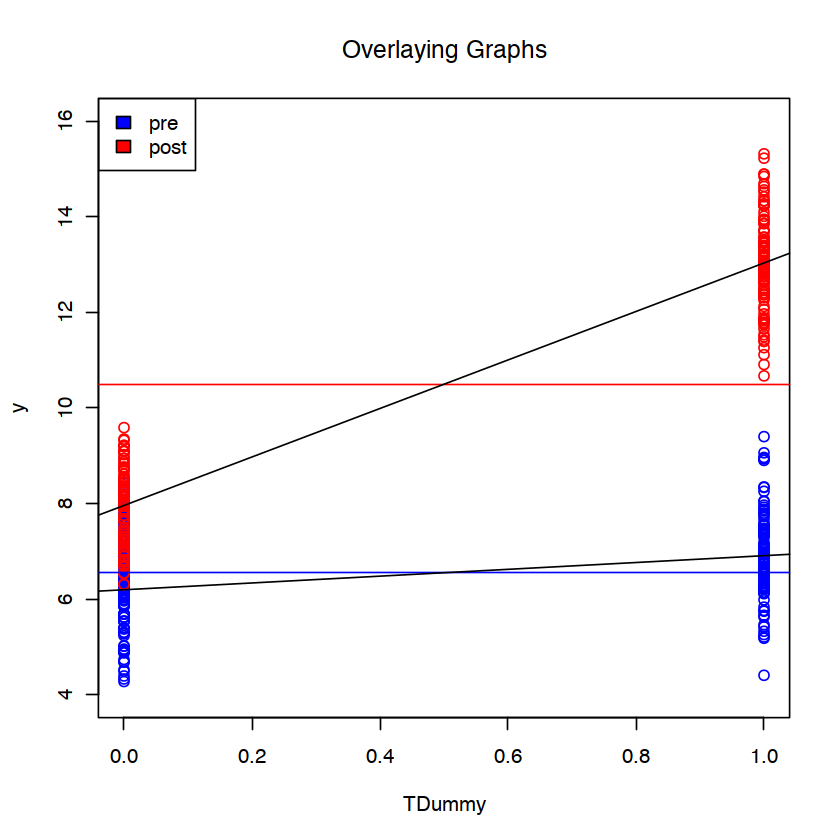

In [8]:
plot(TDummy, y_pre,
main="Overlaying Graphs",
ylab="y",
type="p",
col="blue",
ylim=c(4,16))
points(TDummy, y_post, col="red")
legend("topleft",
c("pre","post"),
fill=c("blue","red")
)

abline(h=6.55, col="blue")  #means
abline(h=10.50, col="red")
abline(lm(y_pre ~ TDummy))  #slopes
abline(lm(y_post ~ TDummy))

In [9]:
#if TDummy == 0 
mean(y_pre, na.rm=TRUE)
mean(y_post, na.rm=TRUE)

pafeb = mean(y_pre[TDummy == 0])  
panov = mean(y_pre[TDummy == 1]) 
njfeb = mean(y_post[TDummy == 0]) 
njnov = mean(y_post[TDummy == 1]) 

print(mean(y_pre[TDummy == 1])/mean(y_pre[TDummy == 0]))
print(mean(y_post[TDummy == 1])/mean(y_post[TDummy == 0]))

print((njnov-njfeb)-(panov-pafeb))

[1] 6.552631

[1] 10.49822

[1] 1.115127
[1] 1.637592
[1] 4.362197


(c) Compute the DiD estimator

In [10]:
didreg = lm(formula = y_post ~ TDummy + TDummy:y_pre)
summary(didreg)


Call:
lm(formula = y_post ~ TDummy + TDummy:y_pre)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29956 -0.61712  0.02763  0.56981  2.24813 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.96046    0.09002  88.427  < 2e-16 ***
TDummy        5.46643    0.68281   8.006 1.01e-13 ***
TDummy:y_pre -0.05658    0.09709  -0.583    0.561    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9002 on 197 degrees of freedom
Multiple R-squared:  0.8897,	Adjusted R-squared:  0.8886 
F-statistic: 794.8 on 2 and 197 DF,  p-value: < 2.2e-16


d) Interpret findings

The DiD estimator is positive and significant. The treatment has positive and significant effect on outcome. However, one should check parallel trend assumption to validate.

3. a) Convert raw return to actual percentage points.

In [11]:
df = read_csv('HW3data/industryreturns.csv')

head(df, n=10)

any(is.na(df))
#No NA

Rows: 132 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): date, NoDur, Durbl, Manuf, Enrgy, HiTec, Telcm, Shops, Hlth, Utils...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
200701,1.35,2.71,3.23,-1.31,2.18,2.88,3.55,3.50,0.38,1.09
200702,-1.79,-0.43,0.80,-2.17,-2.49,-2.50,-0.63,-2.80,4.25,-2.31
200703,2.47,-1.07,1.58,5.99,0.91,2.32,0.73,-0.22,4.34,-0.27
200704,3.74,6.26,4.40,5.39,4.91,2.11,2.23,6.84,3.92,3.39
200705,2.81,3.42,4.84,7.19,3.90,6.68,2.51,1.11,1.20,3.35
200706,-0.86,2.12,-0.60,1.04,0.61,-1.73,-1.95,-3.40,-4.78,-2.68
200707,-4.26,-5.90,-0.10,-1.02,-1.26,-3.15,-5.36,-4.04,-3.82,-5.46
200708,1.83,-1.78,0.74,0.30,2.69,-0.80,1.40,2.30,1.93,0.89
200709,3.76,1.60,5.40,7.80,4.19,1.97,-0.72,3.58,3.57,2.68
200710,2.20,1.04,0.96,2.74,6.84,-2.29,1.07,1.44,6.69,-0.12


[1] FALSE

In [12]:
df$di = 100

In [13]:
head(df)

date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,di
200701,1.35,2.71,3.23,-1.31,2.18,2.88,3.55,3.50,0.38,1.09,100
200702,-1.79,-0.43,0.80,-2.17,-2.49,-2.50,-0.63,-2.80,4.25,-2.31,100
200703,2.47,-1.07,1.58,5.99,0.91,2.32,0.73,-0.22,4.34,-0.27,100
200704,3.74,6.26,4.40,5.39,4.91,2.11,2.23,6.84,3.92,3.39,100
200705,2.81,3.42,4.84,7.19,3.90,6.68,2.51,1.11,1.20,3.35,100
200706,-0.86,2.12,-0.60,1.04,0.61,-1.73,-1.95,-3.40,-4.78,-2.68,100


In [14]:
#percent <- function(x, digits = 2, format = "f", ...) {      # Create user-defined function
#  paste0(formatC(x, format = format, digits = digits, ...), "%")
#}

df1 = df[,-1]/df$di
df <- merge(df1,df$date)
colnames(df)[12] <- "date"
df = df[,-11]

b) Examine the data. Report means by industry. Comment on your findings.

In [15]:
head(df)

NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,date
0.0135,0.0271,0.0323,-0.0131,0.0218,0.0288,0.0355,0.0350,0.0038,0.0109,200701
-0.0179,-0.0043,0.0080,-0.0217,-0.0249,-0.0250,-0.0063,-0.0280,0.0425,-0.0231,200701
0.0247,-0.0107,0.0158,0.0599,0.0091,0.0232,0.0073,-0.0022,0.0434,-0.0027,200701
0.0374,0.0626,0.0440,0.0539,0.0491,0.0211,0.0223,0.0684,0.0392,0.0339,200701
0.0281,0.0342,0.0484,0.0719,0.0390,0.0668,0.0251,0.0111,0.0120,0.0335,200701
-0.0086,0.0212,-0.0060,0.0104,0.0061,-0.0173,-0.0195,-0.0340,-0.0478,-0.0268,200701


In [16]:
summary(df)

     NoDur               Durbl               Manuf          
 Min.   :-0.122500   Min.   :-0.326300   Min.   :-0.207500  
 1st Qu.:-0.009800   1st Qu.:-0.023325   1st Qu.:-0.010275  
 Median : 0.010250   Median : 0.007850   Median : 0.013600  
 Mean   : 0.009245   Mean   : 0.008011   Mean   : 0.009515  
 3rd Qu.: 0.035075   3rd Qu.: 0.041775   3rd Qu.: 0.034525  
 Max.   : 0.074100   Max.   : 0.426300   Max.   : 0.175100  
     Enrgy               HiTec              Telcm               Shops          
 Min.   :-0.172300   Min.   :-0.18230   Min.   :-0.163600   Min.   :-0.151200  
 1st Qu.:-0.031150   1st Qu.:-0.01493   1st Qu.:-0.020050   1st Qu.:-0.009100  
 Median : 0.009850   Median : 0.01710   Median : 0.010550   Median : 0.010250  
 Mean   : 0.004593   Mean   : 0.01070   Mean   : 0.007653   Mean   : 0.009565  
 3rd Qu.: 0.044800   3rd Qu.: 0.04258   3rd Qu.: 0.040100   3rd Qu.: 0.035050  
 Max.   : 0.163900   Max.   : 0.12430   Max.   : 0.104300   Max.   : 0.120800  
      Hlth   

Hitech has the highest mean return of 1.07 (107%) while Energy has the lowest mean return of 0.459. (45.9%) Returns vary quite a lot among industries.

In [17]:
sd(df$NoDur)
sd(df$Durbl)
sd(df$Manuf)
sd(df$Enrgy)
sd(df$HiTec)
sd(df$Telcm)
sd(df$Shops)
sd(df$Hlth)
sd(df$Utils)
sd(df$Other)

[1] 0.03399165

[1] 0.08069539

[1] 0.05177499

[1] 0.05935702

[1] 0.05110522

[1] 0.04642677

[1] 0.04002145

[1] 0.04012129

[1] 0.03803661

[1] 0.05654857

The volatility of the returns of the 10 industries are above. (Std) Durables have the highst volatility of 8.10 while Nondurables the lowest of 3.41. It's surprising that Hitech despite its high returns, have quite average volatility.

c) Standardize the returns to have mean zero and standard deviation one. Perform principal components analysis.

In [18]:
#df1 = scale(df[,-1], scale=TRUE, center=TRUE)
#df <- merge(df1,df$date)
#colnames(df)[11] <- "date"

#head(df)
#summary(df)

In [19]:
#my_pca <- prcomp(df,
#                center = TRUE, retx = T)

my_pca <- prcomp(df[,-11], center = TRUE,scale. = TRUE) #date is removed from pca

names(my_pca)

# Summary
summary(my_pca)
my_pca

[1] "sdev"     "rotation" "center"   "scale"    "x"

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.6792 0.90162 0.81438 0.60700 0.52282 0.45470 0.44152
Proportion of Variance 0.7178 0.08129 0.06632 0.03684 0.02733 0.02068 0.01949
Cumulative Proportion  0.7178 0.79909 0.86542 0.90226 0.92959 0.95027 0.96976
                           PC8     PC9    PC10
Standard deviation     0.39222 0.32220 0.21148
Proportion of Variance 0.01538 0.01038 0.00447
Cumulative Proportion  0.98515 0.99553 1.00000

Standard deviations (1, .., p=10):
 [1] 2.6791819 0.9016211 0.8143843 0.6069964 0.5228162 0.4546982 0.4415179
 [8] 0.3922153 0.3222024 0.2114820

Rotation (n x k) = (10 x 10):
             PC1         PC2          PC3          PC4         PC5         PC6
NoDur -0.3209707 -0.20574793 -0.313269059  0.043979250 -0.51798115  0.03125387
Durbl -0.3219955  0.36487568  0.188589419  0.341555339  0.31361722  0.25891008
Manuf -0.3587469  0.09884357  0.178822209 -0.005370575  0.09624055  0.07049207
Enrgy -0.2658328 -0.23437075  0.721504557 -0.486561281 -0.09990044  0.01174697
HiTec -0.3359681  0.09660734  0.027975616  0.137663533  0.24267344 -0.85649182
Telcm -0.3339348 -0.08376337  0.019180437  0.088319286 -0.53016512 -0.10330923
Shops -0.3340327  0.22061754 -0.215733712  0.148908058 -0.14508703  0.05660649
Hlth  -0.2921623 -0.05782621 -0.513920865 -0.670859032  0.34759767  0.02893193
Utils -0.2379241 -0.77867458 -0.044035892  0.379831620  0.36143112  0.18041331
Other -0.3405858  0.29177814  0.00

(e) What are the principal components' loadings?

In [20]:
# View the principal component loading
# my_pca$rotation[1:5, 1:4]
my_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
NoDur,-0.3209707,-0.20574793,-0.313269059,0.043979250,-0.51798115,0.03125387,0.603723263,0.29815408,0.10073455,-0.147538379
Durbl,-0.3219955,0.36487568,0.188589419,0.341555339,0.31361722,0.25891008,0.001336427,0.21025826,0.51186104,-0.373304683
Manuf,-0.3587469,0.09884357,0.178822209,-0.005370575,0.09624055,0.07049207,0.108555648,0.20809688,0.09339897,0.866880048
Enrgy,-0.2658328,-0.23437075,0.721504557,-0.486561281,-0.09990044,0.01174697,0.146878077,-0.20688723,0.05309196,-0.199449743
HiTec,-0.3359681,0.09660734,0.027975616,0.137663533,0.24267344,-0.85649182,0.091076486,0.05309084,-0.20338652,-0.114500061
Telcm,-0.3339348,-0.08376337,0.019180437,0.088319286,-0.53016512,-0.10330923,-0.742929422,0.14504175,0.09113242,-0.016396190
Shops,-0.3340327,0.22061754,-0.215733712,0.148908058,-0.14508703,0.05660649,0.074743538,-0.85327259,0.08178294,0.080197853
Hlth,-0.2921623,-0.05782621,-0.513920865,-0.670859032,0.34759767,0.02893193,-0.171256418,0.05283089,0.19749670,-0.065915170
Utils,-0.2379241,-0.77867458,-0.044035892,0.379831620,0.36143112,0.18041331,-0.076732372,-0.09825651,-0.10981374,-0.008008018
Other,-0.3405858,0.29177814,0.002223845,-0.037229004,0.04031291,0.38215218,-0.033416631,0.12811581,-0.78031087,-0.152954535


(f) Show a scree plot of the principal components

[1] 17424    10

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
-0.8365665,0.3497236,-0.57935919,-0.06359585,-0.003827467,-0.062726183,-0.296607618,-0.18182872,0.269344986,0.297989991
1.2564382,-0.7131513,0.38654514,0.91447015,0.663759205,0.524486673,-0.016489844,-0.19211477,-0.032261144,0.428763935
-0.5398639,-1.2053200,0.63229758,0.07083948,-0.324761481,0.072787433,0.148981566,-0.11438213,-0.029557753,-0.033825074
-2.2021228,-0.5380630,-0.24682857,-0.64317632,0.586482638,-0.009302481,0.238433369,0.22418184,0.240485929,-0.208642167
-1.8079573,-0.1216161,0.77019991,-0.16652815,-0.739439649,-0.200920018,-0.317826449,0.09004301,-0.005570191,0.089338707
1.5019218,1.0024809,0.97482018,0.02282710,-0.264443879,-0.410836850,0.316525988,0.34241766,0.307496114,-0.131582834
2.8642765,0.4080763,1.10508644,-0.17535945,0.198871231,-0.546872833,-0.174564699,0.49414653,-0.010131406,0.602207988
-0.1892161,-0.3462778,-0.37965948,-0.15633842,0.239432609,-0.215734423,0.354483903,-0.12456483,-0.244442602,-0.005789456
-1.5896198,-0.9177503,0.54575421,-0.65574701,0.148341418,-0.146282248,0.426701902,0.62783508,-0.101687761,0.123529239
-0.7735960,-1.2603372,0.04533917,0.46451532,1.005442368,-0.629738126,0.738537016,-0.18508336,-0.270347161,-0.260362202


[1] 2.6791819 0.9016211 0.8143843 0.6069964 0.5228162 0.4546982 0.4415179
 [8] 0.3922153 0.3222024 0.2114820

[1] 7.17801575 0.81292066 0.66322185 0.36844464 0.27333675 0.20675044
 [7] 0.19493803 0.15383283 0.10381442 0.04472463

[1] 0.717801575 0.081292066 0.066322185 0.036844464 0.027333675 0.020675044
 [7] 0.019493803 0.015383283 0.010381442 0.004472463

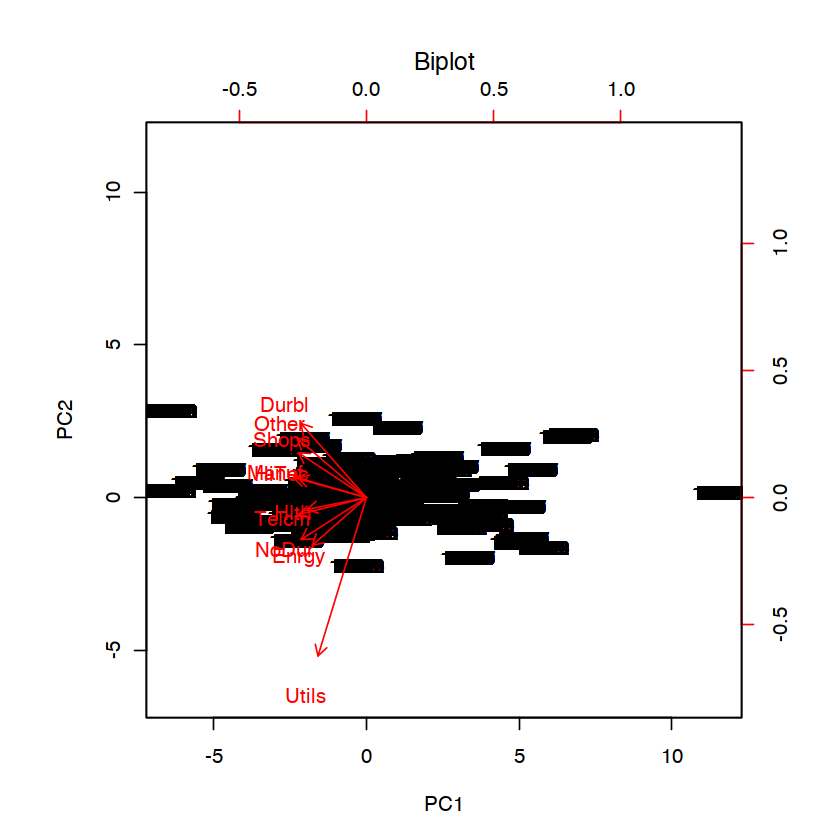

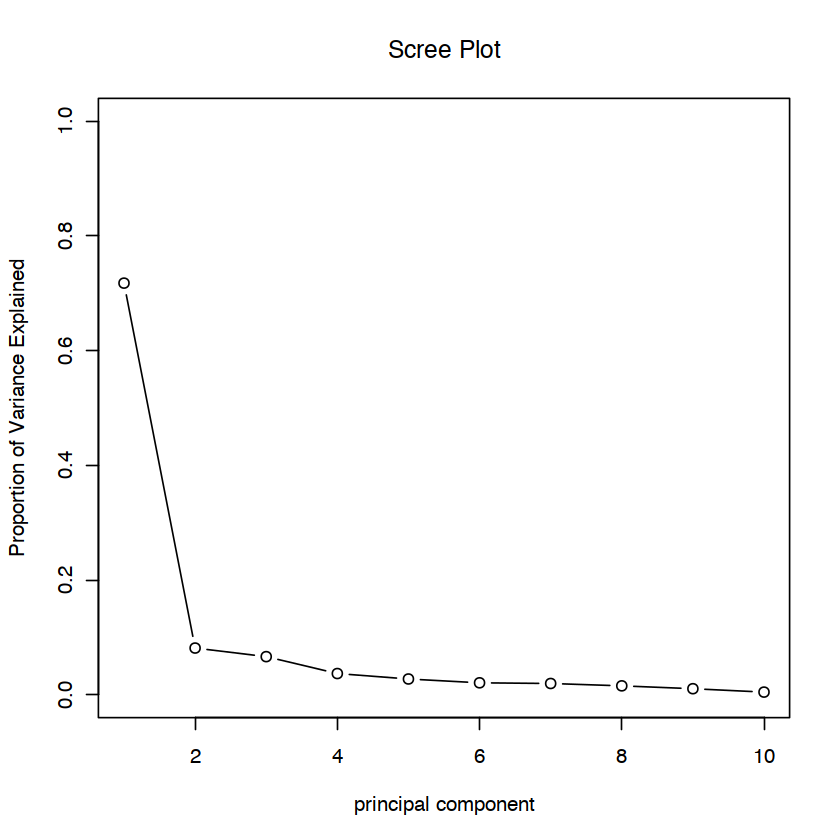

In [21]:
# See the principal components
dim(my_pca$x)
my_pca$x
 
# Plotting the resultant principal components
# The parameter scale = 0 ensures that arrows
# are scaled to represent the loadings
biplot(my_pca, main = "Biplot", scale = 0)
 
# Compute standard deviation
my_pca$sdev
 
# Compute variance
my_pca.var <- my_pca$sdev ^ 2
my_pca.var
 
# Proportion of variance for a scree plot
propve <- my_pca.var / sum(my_pca.var)
propve

# Plot variance explained for each principal component
plot(propve, xlab = "principal component",
            ylab = "Proportion of Variance Explained",
            ylim = c(0, 1), type = "b",
            main = "Scree Plot")



g) Compute the proportion of variance explained by each principal component.

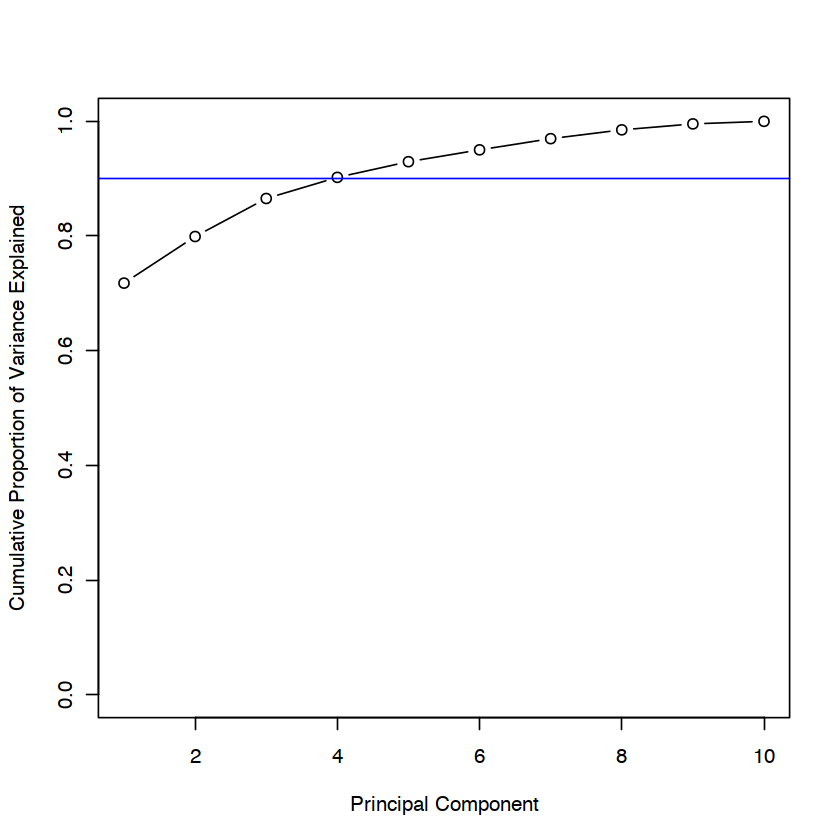

In [22]:
# Plot the cumulative proportion of variance explained
plot(cumsum(propve),
    xlab = "Principal Component",
    ylab = "Cumulative Proportion of Variance Explained",
    ylim = c(0, 1), type = "b")
abline(h=.9, col="blue")  #means

We need at least 4 principal components to explain at least 90% of the variation in the data.